In [40]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers, optimizers
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
train_df = pd.read_csv('train.csv')

y_train_df = np.array(train_df['SalePrice'])

x_train_df = train_df.drop(labels=['Id', 'SalePrice'], axis=1)

num_cols = x_train_df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = x_train_df.select_dtypes(include=['object']).columns

x_train_df[num_cols] = x_train_df[num_cols].fillna(x_train_df[num_cols].mean())
x_train_df[cat_cols] = x_train_df[cat_cols].fillna("None")

x_train_df = pd.get_dummies(x_train_df, columns=cat_cols, drop_first=True)

In [42]:
x_train = np.array(x_train_df).astype(np.float32)
y_train = np.array(y_train_df).astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)


In [45]:
optimizer = optimizers.RMSprop(learning_rate=0.001)
model = keras.Sequential([
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1)
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["mae"])
history = model.fit(
    x_train, y_train,
    epochs=200, batch_size=32, validation_split=0.2)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 40574341120.0000 - mae: 183135.7031 - val_loss: 37702369280.0000 - val_mae: 180788.3594
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39691784192.0000 - mae: 182383.1875 - val_loss: 36977954816.0000 - val_mae: 179224.2812
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 37900615680.0000 - mae: 179076.1406 - val_loss: 35124178944.0000 - val_mae: 175163.6562
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 34672885760.0000 - mae: 172189.9531 - val_loss: 31709767680.0000 - val_mae: 167265.7500
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31055917056.0000 - mae: 163755.5469 - val_loss: 26752270336.0000 - val_mae: 154495.1406
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27450871808.0000 - mae: 151621.5156 - val_loss: 20469719040.0000 - val_mae: 134827.2500
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18067718144.0000 - mae: 124979.5078 - val_loss: 1436545228

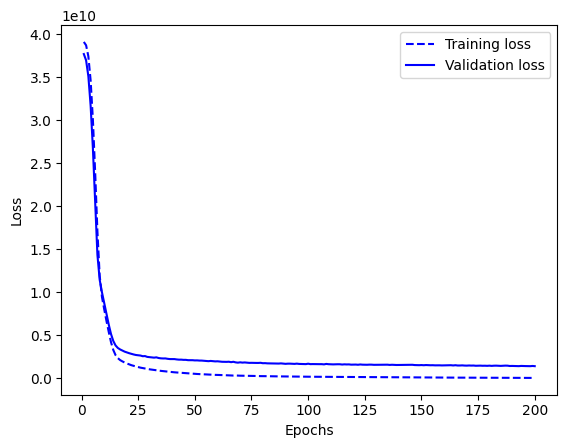

In [46]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, 201)
plt.plot(epochs, loss, "b--", label="Training loss")
plt.plot(epochs, val_loss, "b-", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()